# Lab 2

## Part 1: Load Data

    --Step 1: Reading data from four text files using NumPy and Pandas

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('anger-ratings.txt', header = None, sep = '\t')
df2 = pd.read_csv('fear-ratings.txt', header = None, sep = '\t')
df3 = pd.read_csv('joy-ratings.txt', header = None, sep = '\t')
df4 = pd.read_csv('sadness-ratings.txt', header = None, sep = '\t')

# df1

    --Step 2: Combine four sub datasets

In [2]:
dfs = [df1, df2, df3, df4]
df = pd.concat(dfs)
df.columns = ["ID", "Sentence", "Feeling", "Rating"]
df

,ID,Sentence,Feeling,Rating
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
781,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
782,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
783,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
784,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


    --Step 3: Shuffle the new dataset

In [3]:
df = df.sample(frac = 1)
df

,ID,Sentence,Feeling,Rating
254,40254,The voice is all about Miley and Alicia this y...,sadness,0.604
287,20287,Rojo is shocking.......absolutely shocking !!!,fear,0.625
109,20109,"When you wake up, scroll through social media,...",fear,0.787
782,30782,"Pinky is so funny n jovial, bt she got emotion...",joy,0.160
17,30017,2 days until #GoPackGo and 23 days until #GoGi...,joy,0.880
...,...,...,...,...
567,10567,Projection is perception. See it in someone el...,anger,0.417
218,30218,Why have I only just started watching glee thi...,joy,0.625
702,20702,If you really care like you state @flyfrontier...,fear,0.420
519,10519,@marthalyssa yep. LOL,anger,0.438


    --Step 4: Show the shape of the dataset

In [4]:
shape = df.shape
print('Dataset shape: ', shape)

Dataset shape:  (3613, 4)


## Part 2: Plot word frequency for Top 30 words

    --Step 1: Check missing value

In [5]:
df.isnull().sum()

ID          0
Sentence    0
Feeling     0
Rating      0
dtype: int64

    --Step 2: Check duplicate value

In [6]:
dups = df.duplicated()
dups

254    False
287    False
109    False
782    False
17     False
       ...  
567    False
218    False
702    False
519    False
146    False
Length: 3613, dtype: bool

    --Step 3: Create term-document matrix

In [7]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer()
sparse_matrix = count_vect.fit_transform(df.Sentence)
#print(sparse_matrix)

#sparse_matrix.shape
#count_vect.vocabulary_

dataf = pd.DataFrame(sparse_matrix.todense())
dataf


,0,1,2,3,4,5,6,7,8,9,...,10105,10106,10107,10108,10109,10110,10111,10112,10113,10114
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    --Step 4: Count frequency and sort them

In [8]:
dataf.columns = count_vect.get_feature_names()
dataf = dataf.T
dataf

,0,1,2,3,4,5,6,7,8,9,...,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00pm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00tiffanyr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
اليوم_الوطني,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ध_य,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
य_ब,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
सत,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    --Step 5: Plot the top 30 words frequencies

In [9]:
dataf["Count"] = dataf.sum(axis=1)

In [10]:
dataf

,0,1,2,3,4,5,6,7,8,9,...,3604,3605,3606,3607,3608,3609,3610,3611,3612,Count
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
00pm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
00tiffanyr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
اليوم_الوطني,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ध_य,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
य_ब,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
सत,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [12]:
dataf.sort_values("Count", ascending = False)
dataf

,0,1,2,3,4,5,6,7,8,9,...,3604,3605,3606,3607,3608,3609,3610,3611,3612,Count
the,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1736
to,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1289
and,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,955
you,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2,0,2,0,0,796
of,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflatable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
inflame,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
infections,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
infants,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


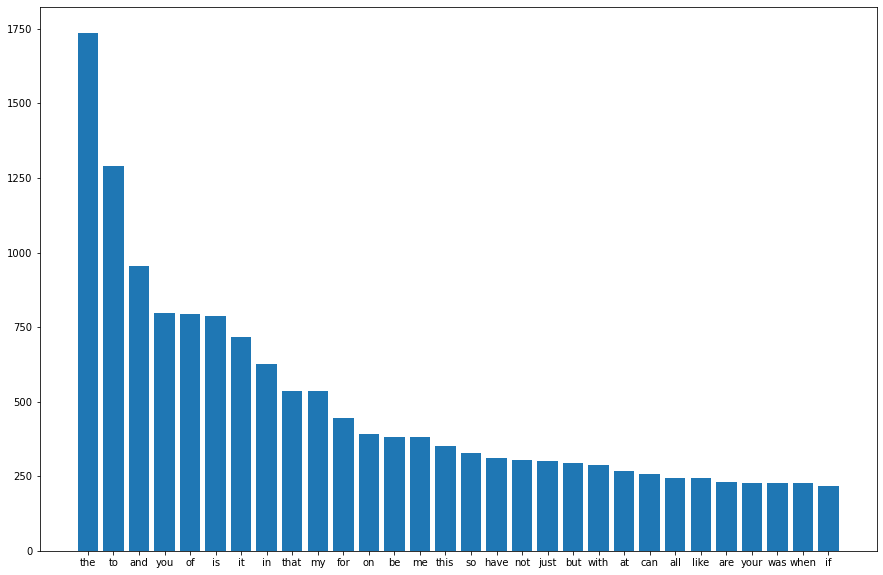

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10))

top30 = dataf.head(30)
#print(top30)
plt.bar(top30.index, top30['Count'])
plt.show()